## Import packages

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import os
import subprocess
%matplotlib inline

## Read data

Read the file **header.pkl** with pandas as DataFrame and the file **seismic_data_source_1000.nc** with xarray as DataSet

In [2]:
filenames=["header_new.pkl","seismic_data_source_1000.nc"]
for filename in filenames:
    if os.path.isfile(filename):
        print(filename+" exists.")
    else: 
        url = 'https://filedn.com/lEzjnrJwSG47nSDwzIitUuf'
        folder='/Data/swi_python/'
        command = ['wget', url+folder+filename]
        subprocess.run(command)

header = pd.read_pickle(filenames[0])
seismic_data= xr.open_dataset(filenames[1])
seismic_data

header_new.pkl exists.
seismic_data_source_1000.nc exists.


<xarray.Dataset>
Dimensions:  (twt: 4001, time: 4001, cdp: 1180)
Coordinates:
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time     (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
  * cdp      (cdp) int32 871637 871638 871639 871640 ... 872814 872815 872816
Data variables:
    data     (cdp, time) float32 ...
Attributes:
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    source_file:         Niscota_4B.sgy
    percentiles:         [-8.89837605e+02 -8.00424402e+02 -1.07494686e+02  1....

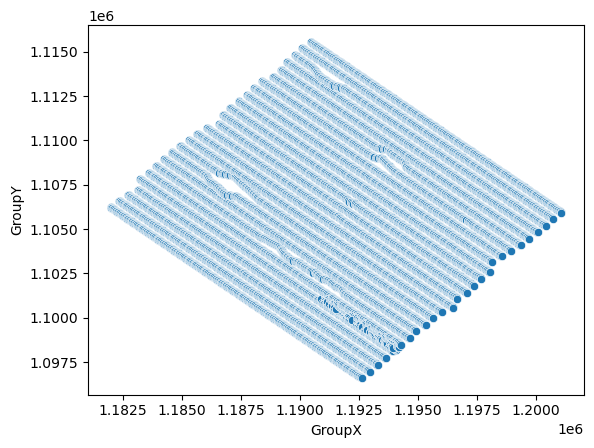

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new
0,1,1,9,1,1,23,0,12,0,1,...,0,0,0,0,0,0,133195.117308,1.613410e+06,133695.147082,1.613429e+06
1,2,2,9,2,1,24,0,12,0,1,...,0,0,0,0,0,0,133243.281522,1.613410e+06,133695.147082,1.613429e+06
2,3,3,9,3,1,25,0,12,0,1,...,0,0,0,0,0,0,133290.704658,1.613410e+06,133695.147082,1.613429e+06
3,4,4,9,4,1,26,0,12,0,1,...,0,0,0,0,0,0,133338.868872,1.613411e+06,133695.147082,1.613429e+06
4,5,5,9,5,1,27,0,12,0,1,...,0,0,0,0,0,0,133386.292008,1.613411e+06,133695.147082,1.613429e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981934,8666679,2981935,3628,1916,2933,210725,0,12,0,1,...,0,0,0,0,0,0,147364.797755,1.626009e+06,144561.355938,1.625250e+06
2981935,8666680,2981936,3628,1917,2933,210726,0,12,0,1,...,0,0,0,0,0,0,147412.961969,1.626009e+06,144561.355938,1.625250e+06
2981936,8666681,2981937,3628,1918,2933,210727,0,12,0,1,...,0,0,0,0,0,0,147460.385105,1.626009e+06,144561.355938,1.625250e+06
2983819,8670862,2983820,3530,2084,2935,206392,0,12,0,1,...,0,0,0,0,0,0,147509.220738,1.626009e+06,144792.985494,1.624750e+06


In [3]:
rec_pos=header.drop_duplicates(subset=['GroupX','GroupY'])
sns.scatterplot(data=rec_pos, x="GroupX", y="GroupY")
plt.show()
rec_pos

## Create new dimensions
Compute **Azimuth** and **Offset** from sources and receivers positions.

In [4]:
pos_x=np.array(header['SourceX']-header['GroupX'], dtype='f')
pos_y=np.array(header['SourceY']-header['GroupY'], dtype='f')
azimuth=np.arctan2(-pos_x, pos_y) * 180 / np.pi+180
offset = np.linalg.norm([pos_x,pos_y], axis=0)  
header['Azimuth']=azimuth
header['Offset']=offset
source=1000
header=header[header['EnergySourcePoint']==source] # Analizar disparo source
header

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new,Azimuth,Offset
871637,2370881,871638,3225,290,1000,137174,0,12,0,1,...,0,0,0,0,136136.843809,1.619959e+06,137020.002344,1.622822e+06,120.681747,2996.459473
871638,2370882,871639,3225,291,1000,137175,0,12,0,1,...,0,0,0,0,136184.336604,1.619960e+06,137020.002344,1.622822e+06,121.547081,2981.657471
871639,2370883,871640,3225,292,1000,137176,0,12,0,1,...,0,0,0,0,136232.500818,1.619960e+06,137020.002344,1.622822e+06,122.437134,2968.078369
871640,2370884,871641,3225,293,1000,137177,0,12,0,1,...,0,0,0,0,136280.665033,1.619961e+06,137020.002344,1.622822e+06,123.335167,2955.221924
871641,2370885,871642,3225,294,1000,137178,0,12,0,1,...,0,0,0,0,136328.829247,1.619961e+06,137020.002344,1.622822e+06,124.240814,2943.097900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872812,2373481,872813,3225,2890,1000,184955,0,12,0,1,...,0,0,0,0,138135.597686,1.625503e+06,137020.002344,1.622822e+06,295.232635,2904.095947
872813,2373482,872814,3225,2891,1000,184956,0,12,0,1,...,0,0,0,0,138183.761900,1.625504e+06,137020.002344,1.622822e+06,294.364471,2923.354980
872814,2373483,872815,3225,2892,1000,184957,0,12,0,1,...,0,0,0,0,138231.856455,1.625503e+06,137020.002344,1.622822e+06,293.497772,2941.960693
872815,2373484,872816,3225,2893,1000,184958,0,12,0,1,...,0,0,0,0,138280.020669,1.625503e+06,137020.002344,1.622822e+06,292.652588,2962.539062


Compute **Geodesic**

In [5]:
import pickle
with open('inter_topo.pkl', 'rb') as f:
     rbf = pickle.load(f)
x_pts=header[['SourceX_new','ReceiverX']].to_numpy().astype('f')
y_pts=header[['SourceY_new','ReceiverY']].to_numpy().astype('f')
xt = np.transpose(np.linspace(x_pts[:,0],x_pts[:,1],20))
yt = np.transpose(np.linspace(y_pts[:,0],y_pts[:,1],20))
np.shape(xt)

(1180, 20)

In [6]:
zt = rbf(xt,yt)
#zt = np.zeros(np.shape(xt))
#for i in range(np.size(xt,axis=0)):
#    zt[i,:] = rbf(xt[i,:], yt[i,:])
np.shape(zt)
geodesic = np.sum(np.linalg.norm([np.diff(xt),np.diff(yt),np.diff(zt)], axis=0), axis=1)
header['Geodesic']=geodesic
header

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new,Azimuth,Offset,Geodesic
871637,2370881,871638,3225,290,1000,137174,0,12,0,1,...,0,0,0,136136.843809,1.619959e+06,137020.002344,1.622822e+06,120.681747,2996.459473,3115.732396
871638,2370882,871639,3225,291,1000,137175,0,12,0,1,...,0,0,0,136184.336604,1.619960e+06,137020.002344,1.622822e+06,121.547081,2981.657471,3088.397858
871639,2370883,871640,3225,292,1000,137176,0,12,0,1,...,0,0,0,136232.500818,1.619960e+06,137020.002344,1.622822e+06,122.437134,2968.078369,3065.795262
871640,2370884,871641,3225,293,1000,137177,0,12,0,1,...,0,0,0,136280.665033,1.619961e+06,137020.002344,1.622822e+06,123.335167,2955.221924,3052.985371
871641,2370885,871642,3225,294,1000,137178,0,12,0,1,...,0,0,0,136328.829247,1.619961e+06,137020.002344,1.622822e+06,124.240814,2943.097900,3039.486599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872812,2373481,872813,3225,2890,1000,184955,0,12,0,1,...,0,0,0,138135.597686,1.625503e+06,137020.002344,1.622822e+06,295.232635,2904.095947,2938.840724
872813,2373482,872814,3225,2891,1000,184956,0,12,0,1,...,0,0,0,138183.761900,1.625504e+06,137020.002344,1.622822e+06,294.364471,2923.354980,2958.418758
872814,2373483,872815,3225,2892,1000,184957,0,12,0,1,...,0,0,0,138231.856455,1.625503e+06,137020.002344,1.622822e+06,293.497772,2941.960693,2978.213948
872815,2373484,872816,3225,2893,1000,184958,0,12,0,1,...,0,0,0,138280.020669,1.625503e+06,137020.002344,1.622822e+06,292.652588,2962.539062,3000.117029


Histogram of the **Azimuth** for the source 1000.

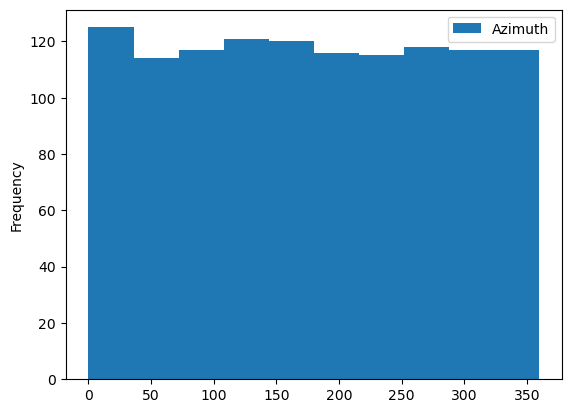

In [7]:
source=1000
shot_pos=header[header['EnergySourcePoint']==source]
shot_pos[['Azimuth']].plot.hist()
plt.show()

## Highligth position by azimuth bin
Show receivers fro the source 1000 with azimuth from 90 to 110.

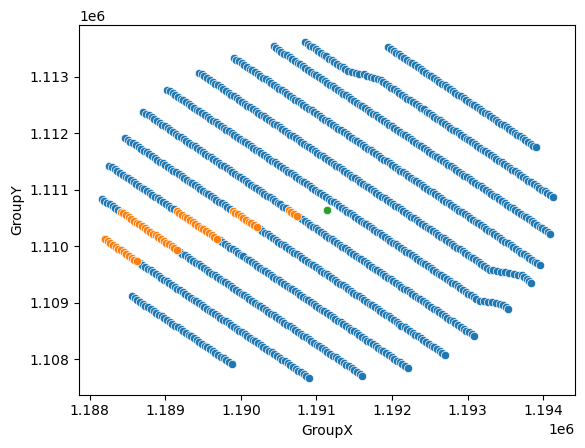

In [8]:
az_1=90 
d_az=20
az_2=az_1+d_az                  #Limit values of azimuth
shot_azimuth_pos=shot_pos[(shot_pos['Azimuth']>az_1)&(shot_pos['Azimuth']<az_2)]
sns.scatterplot(data=header, x="GroupX", y="GroupY")
sns.scatterplot(data=shot_azimuth_pos, x="GroupX", y="GroupY")
sns.scatterplot(data=shot_azimuth_pos, x="SourceX", y="SourceY")
plt.show()

## Selecting traces for the azimuth bin
Create the azimuth coordinate for the DataSet **seismic_data**

In [9]:
seismic_data["azimuth"] = ("azimuth",  shot_pos['Azimuth'])
seismic_data["offset"] = ("azimuth",  shot_pos['Offset'])
seismic_data["geodesic"] = ("azimuth",  shot_pos['Geodesic'])
seismic_data["data"] = (("azimuth", "time"), np.array(seismic_data.data))
seismic_data

<xarray.Dataset>
Dimensions:   (twt: 4001, time: 4001, azimuth: 1180, cdp: 1180)
Coordinates:
  * twt       (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time      (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
  * cdp       (cdp) int32 871637 871638 871639 871640 ... 872814 872815 872816
  * azimuth   (azimuth) float32 120.7 121.5 122.4 123.3 ... 293.5 292.7 291.8
Data variables:
    data      (azimuth, time) float32 26.84 25.84 23.84 ... 9.652 10.65 6.652
    offset    (azimuth) float32 2.996e+03 2.982e+03 ... 2.963e+03 2.984e+03
    geodesic  (azimuth) float64 3.116e+03 3.088e+03 ... 3e+03 3.022e+03
Attributes:
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    source_file:         Niscota_4B.sgy
    percentiles:         [-8.89837605e+02 -8.00424402e+02 -1.07494686e+02  1....

Select DataArray **data_azimuth** from the DataSet **seimisc_data** in the azimuth bin.

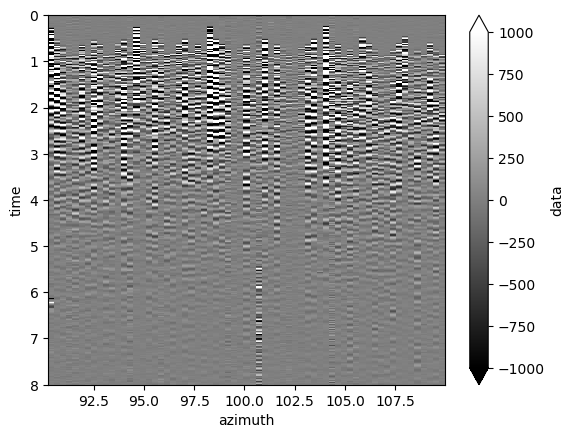

In [10]:
data = seismic_data.where((seismic_data.azimuth>az_1)&(seismic_data.azimuth<az_2), drop=True)  #Select traces for the azimuth bin
data_azimuth = data.data.sortby('azimuth') #Sort DataArray by azimuth
data_azimuth.plot.imshow('azimuth','time',cmap='gray', vmin=-1000, vmax=1000, origin='upper')

Plot the shot gather foe the azimuth bin sort by azimuth.

## Sort the data by offset and geodesic
Select DataArray **data_offset** from the DataSet **data** in the azimuth bin.
Select DataArray **data_geodesic** from the DataSet **data** in the azimuth bin.

In [11]:
data=data.swap_dims({"azimuth": "offset"})
data_offset = data.data.sortby('offset') #Sort DataArray by offset
data=data.swap_dims({"offset": "geodesic"})
data_geodesic = data.data.sortby('geodesic') #Sort DataArray by offset

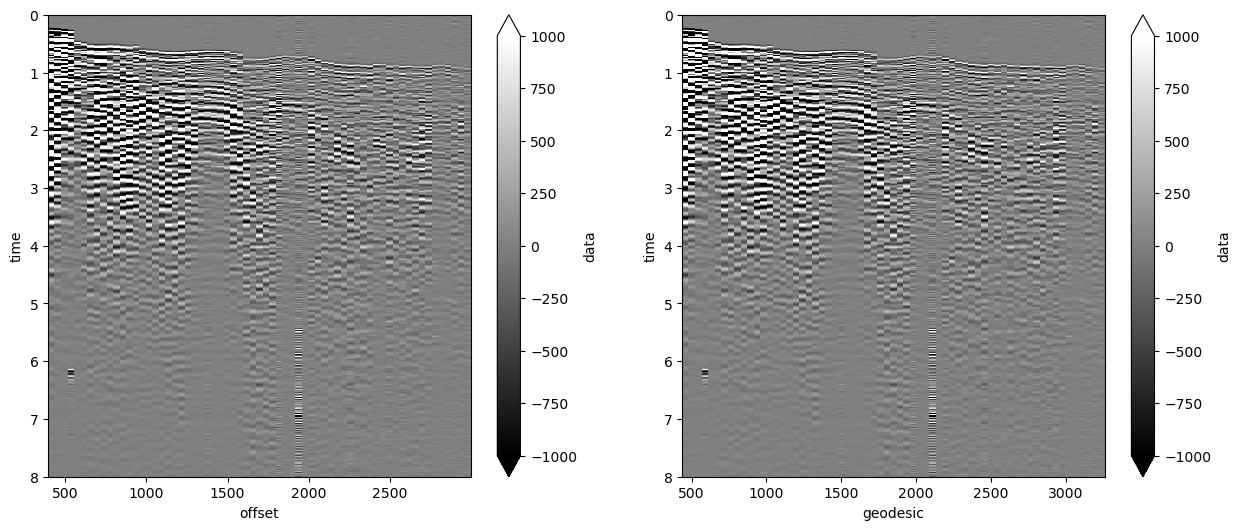

In [12]:
plt.rcParams['figure.figsize'] = [15, 6]
fig, axs = plt.subplots(1,2)
data_offset.plot.imshow('offset','time',cmap='gray', vmin=-1000, vmax=1000, origin='upper', ax=axs[0])
data_geodesic.plot.imshow('geodesic','time',cmap='gray', vmin=-1000, vmax=1000, origin='upper', ax=axs[1])

In [13]:
data_offset

<xarray.DataArray 'data' (offset: 65, time: 4001)>
array([[ -6.117275  ,  -6.117275  ,  -4.117222  , ...,   0.88266945,
         -3.1167212 ,  -8.117185  ],
       [ 16.121216  ,   8.121343  ,   2.120884  , ...,  -6.8787937 ,
        -18.878708  , -29.878906  ],
       [ -9.644381  ,  -8.644425  ,  -5.644562  , ...,   0.3553915 ,
          5.3553143 ,  13.355469  ],
       ...,
       [ 44.947525  ,  36.948044  ,  36.948044  , ...,  44.948944  ,
         37.9494    ,  26.949219  ],
       [-40.781998  , -31.781235  , -24.782074  , ...,  25.218292  ,
          6.2188272 ,   8.21875   ],
       [-21.762146  , -25.761139  , -19.761536  , ...,  28.23848   ,
         18.238617  ,  23.238281  ]], dtype=float32)
Coordinates:
  * offset   (offset) float32 410.4 438.3 470.4 ... 2.951e+03 2.983e+03
  * time     (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
    azimuth  (offset) float32 104.1 98.93 94.39 90.34 ... 101.5 100.8 100.0

In [14]:
data_geodesic

<xarray.DataArray 'data' (geodesic: 65, time: 4001)>
array([[ -6.117275  ,  -6.117275  ,  -4.117222  , ...,   0.88266945,
         -3.1167212 ,  -8.117185  ],
       [ 16.121216  ,   8.121343  ,   2.120884  , ...,  -6.8787937 ,
        -18.878708  , -29.878906  ],
       [ -9.644381  ,  -8.644425  ,  -5.644562  , ...,   0.3553915 ,
          5.3553143 ,  13.355469  ],
       ...,
       [ 44.947525  ,  36.948044  ,  36.948044  , ...,  44.948944  ,
         37.9494    ,  26.949219  ],
       [-40.781998  , -31.781235  , -24.782074  , ...,  25.218292  ,
          6.2188272 ,   8.21875   ],
       [-21.762146  , -25.761139  , -19.761536  , ...,  28.23848   ,
         18.238617  ,  23.238281  ]], dtype=float32)
Coordinates:
    offset    (geodesic) float32 410.4 438.3 470.4 ... 2.951e+03 2.983e+03
  * geodesic  (geodesic) float64 453.9 486.0 525.0 ... 3.211e+03 3.245e+03
  * time      (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
    azimuth   (geodesic) float32 104.1 98.93 94.39 90.34 ... 101.5 100.8 100.0

Plot the shot gather for the azimuth bin sort by offset.

Text(0, 0.5, 'Phase velocity (m/s)')

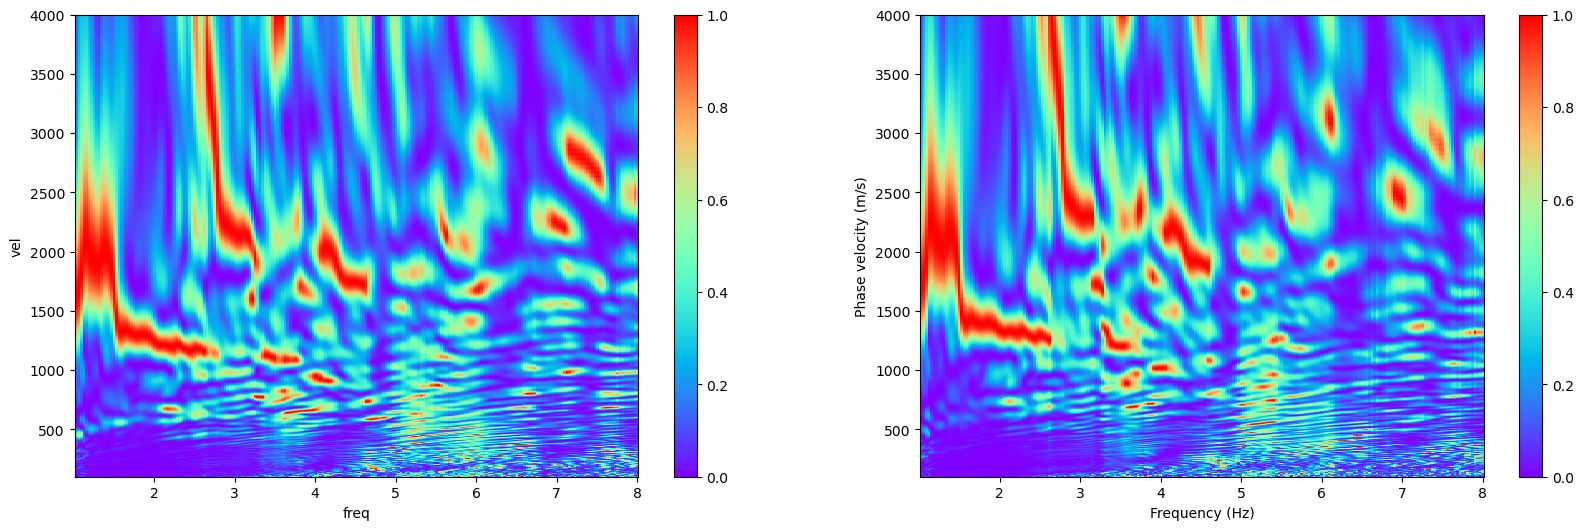

In [15]:
import masw_functions as mf
vmin=100.0 
vmax=4001.0
fmin=1.0 
fmax=8.0
pstep=5e-6
Nf=16001
v=np.arange(vmin,vmax)
D_offset=mf.DispersionSpectrum(data_offset,v,fmin,fmax,Nf,pstep)
D_geodesic=mf.DispersionSpectrum(data_geodesic,v,fmin,fmax,Nf,pstep)
#D_geodesic=D_offset-D_geodesic
plt.rcParams['figure.figsize'] = [20, 6]
fig, axs = plt.subplots(1,2)
D_offset.plot.imshow(D_offset.dims[1],D_offset.dims[0],cmap='rainbow', origin='lower', ax=axs[0])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (m/s)")
D_geodesic.plot.imshow(D_geodesic.dims[1],D_geodesic.dims[0],cmap='rainbow', origin='lower', ax=axs[1])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (m/s)")

## Check alliased region

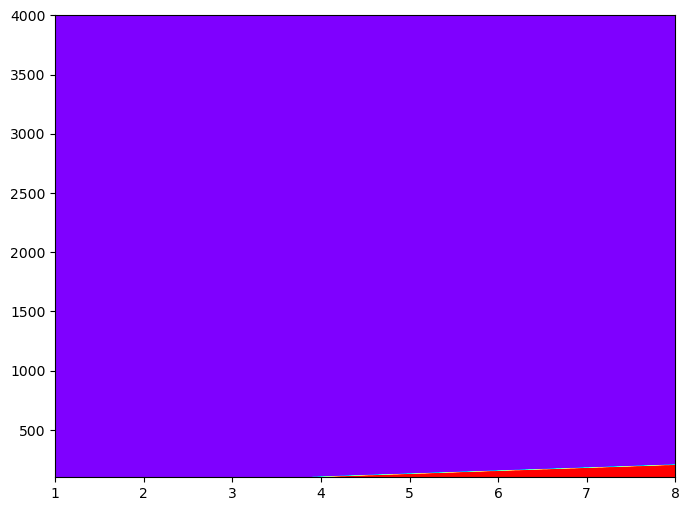

In [16]:
ff, vv = np.meshgrid(D_offset.freq, D_offset.vel.vel)
plt.rcParams['figure.figsize'] = [8, 6]
time = seismic_data['time'].values
geodesic = data_geodesic['geodesic'].values
dxmin = np.min(np.diff(geodesic))
dxmax = np.max(np.diff(geodesic))
#dx = 0.5*(dxmin + dxmax)
dx = len(np.abs(np.diff(geodesic))) / np.sum(1.0 / np.abs(np.diff(geodesic)))
kn = 1/(2*dx)
M = (ff/vv-2*kn > 0)
plt.imshow(M,cmap='rainbow', origin='lower',extent=(fmin, fmax, vmin, vmax),aspect='auto')